# Import

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
from pathlib import Path

Using TensorFlow backend.


# Import data

In [2]:
# data = pd.read_csv('../data/2018_10_18_trump.csv', header=None)
# data = pd.read_csv('../data/trump/train_rounds_filtered_merged.csv', header=None)
data = pd.read_csv('../data/2017_10_11_trump.csv', header=None)

cards = [
    # Diamonds
    'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
    # Hearts
    'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
    # Spades
    'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
    # Clubs
    'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user  = ['user']
trump = ['trump']
data.columns = cards + forehand + user + trump
data.drop('user', axis='columns', inplace=True)
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,2
1,0,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,6
2,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,6
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,3


In [3]:
x = data.drop('trump', axis='columns', inplace=False)
x.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,FH
0,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,1,0,1,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
3,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


# Neural Network

In [4]:
y_label = data['trump']
y = keras.utils.to_categorical(y_label, num_classes=7)

model = keras.Sequential()
model.add(keras.layers.Dense(37, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=100, shuffle=True)

Train on 187730 samples, validate on 62577 samples
Epoch 1/50
187730/187730 [==============================] - 2s 10us/step - loss: 1.4570 - accuracy: 0.4839 - val_loss: 1.0674 - val_accuracy: 0.6223
Epoch 2/50
187730/187730 [==============================] - 2s 10us/step - loss: 0.8513 - accuracy: 0.6853 - val_loss: 0.7301 - val_accuracy: 0.7225
Epoch 3/50
187730/187730 [==============================] - 2s 10us/step - loss: 0.6847 - accuracy: 0.7389 - val_loss: 0.6595 - val_accuracy: 0.7451
Epoch 4/50
187730/187730 [==============================] - 2s 10us/step - loss: 0.6468 - accuracy: 0.7538 - val_loss: 0.6417 - val_accuracy: 0.7539
Epoch 5/50
187730/187730 [==============================] - 2s 11us/step - loss: 0.6334 - accuracy: 0.7579 - val_loss: 0.6309 - val_accuracy: 0.7552
Epoch 6/50
187730/187730 [==============================] - 2s 10us/step - loss: 0.6239 - accuracy: 0.7605 - val_loss: 0.6253 - val_accuracy: 0.7619
Epoch 7/50
187730/187730 [=============================

# Results

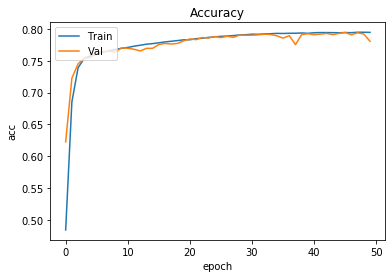

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

# Notes

with Dataset ../data/2017_10_11_trump.csv --> 0.5282 - accuracy: 0.7940

with Dataset ../data/2018_10_18_trump.csv --> loss: 0.7969 - accuracy: 0.6575

with Dataset ../data/train_rounds_filtered_merged.csv --> loss: 0.8309 - accuracy: 0.6365